In [210]:
using Interpolations
using Distributed
using DataFrames
using Printf
using JLD
using CSV
using Dierckx
using Dates
using PyPlot
# using PyCall
using Seaborn
using LaTeXStrings

main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

# SVM HeatMaps and Surfaces

In [245]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

In [246]:
bt = Batch.BatchObj()
pt = ModelPlots.PlotsObj(bt; svm_m =1.)

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Unable to load SVM data


Main.ModelPlots.PlotStruct
  bt: Main.Batch.BatchStruct
  cvm_data: DataFrame  1040 observations of 35 variables

  svm_data: DataFrame  0 observations of 0 variables

  _svm_surf: DataFrame  0 observations of 0 variables

  xylabels: Dict{Symbol,Array{String,1}}
  zlabels: Dict{Symbol,Array{String,1}}


In [247]:
pt.svm_data = CSV.read("/mnt/ide0/home/artur/BondPricing/Julia/Results/SVM/m_1.0/opt_k_structs.csv")

,comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,m,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Bool⍰,Float64⍰
1,1,0.02,0.02,0.0,0.001,0.1,0.2,0.15,1.0,1.0,4.23312,52.2081,56.2165,55.0215,55.9188,0.00207794,-0.000151834,0.000994973,52.2081,52.2102,58.4077,58.4021,110.612,47.2011,22.2061,100.0,0.08,0.6,0.27,1.0,0.00207794,3.9801e-5,3.9801e-5,-0.000151834,false,0.0
2,2,0.02,0.02,0.0,0.0025,0.1,0.2,0.15,1.0,1.0,4.24152,51.3778,55.6408,54.4943,55.3148,0.00138908,-0.00016732,0.00098393,51.3778,51.3792,58.5168,58.5131,109.892,46.7541,20.3458,100.0,0.08,0.6,0.27,1.0,0.00138908,2.70365e-5,2.70365e-5,-0.00016732,false,0.0
3,3,0.02,0.02,0.0,0.003,0.1,0.2,0.15,1.0,1.0,4.24467,51.1103,55.4566,54.3258,55.1213,0.00122589,-0.000165478,0.000980638,51.1103,51.1115,58.5474,58.5439,109.655,46.611,19.7499,100.0,0.08,0.6,0.27,1.0,0.00122589,2.39851e-5,2.39851e-5,-0.000165478,false,0.0
4,4,0.02,0.02,0.0,0.004,0.1,0.2,0.15,1.0,1.0,4.24887,50.5605,55.0686,53.9695,54.7155,0.000871524,-0.00012212,0.000917795,50.5605,50.5614,58.6279,58.6267,109.188,46.3067,18.5847,100.0,0.08,0.6,0.27,1.0,0.000871524,1.72372e-5,1.72372e-5,-0.00012212,false,0.0
5,5,0.02,0.02,0.0,0.005,0.1,0.2,0.15,1.0,1.0,4.25308,50.0274,54.6949,53.6265,54.3241,0.000361601,-0.000177173,0.000908532,50.0274,50.0278,58.6944,58.6947,108.723,46.0142,17.4547,100.0,0.08,0.6,0.27,1.0,0.000361601,7.22806e-6,7.22806e-6,-0.000177173,false,0.0
6,6,0.02,0.02,0.0,0.001,0.2,0.2,0.15,1.0,1.0,4.08506,50.3868,54.6222,53.1025,53.9683,0.00181426,-0.000167201,0.000922812,50.3868,50.3886,59.5397,59.5405,109.929,45.8374,20.0137,100.0,0.08,0.6,0.27,1.0,0.00181426,3.60067e-5,3.60067e-5,-0.000167201,false,0.0
7,7,0.02,0.02,0.0,0.0025,0.2,0.2,0.15,1.0,1.0,4.08611,49.4938,53.9501,52.4958,53.2863,0.0013975,-0.000223533,0.000911351,49.4937,49.4952,59.7529,59.7528,109.248,45.3054,18.3111,100.0,0.08,0.6,0.27,1.0,0.0013975,2.82358e-5,2.82358e-5,-0.000223533,false,0.0
8,8,0.02,0.02,0.0,0.003,0.2,0.2,0.15,1.0,1.0,4.08401,49.1751,53.7009,52.2688,53.0342,0.00120378,-0.000228823,0.000908395,49.175,49.1763,59.8468,59.8468,109.023,45.1063,17.7537,100.0,0.08,0.6,0.27,1.0,0.00120378,2.44794e-5,2.44794e-5,-0.000228823,false,0.0
9,9,0.02,0.02,0.0,0.004,0.2,0.2,0.15,1.0,1.0,4.07876,48.5348,53.1953,51.8071,52.5233,0.000891549,-0.000317811,0.000898122,48.5348,48.5357,60.0422,60.0417,108.577,44.7015,16.6668,100.0,0.08,0.6,0.27,1.0,0.000891549,1.83693e-5,1.83693e-5,-0.000317811,false,0.0


In [236]:
# pt.svm_data = CSV.read(string(bt.mi.maturity_path, "/opt_k_structs.csv"))

,comb_num,m,m_comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Bool⍰,Float64⍰
1,1,1.0,1,0.02,0.02,0.0,0.001,0.1,0.2,0.15,1.0,4.18587,51.6686,55.84,54.4563,55.3432,4.58361e-5,-8.02022e-5,0.000982615,51.6686,51.6686,58.4297,58.4263,110.095,46.931,20.8868,100.0,0.08,0.6,0.27,1.0,4.58361e-5,8.87118e-7,8.87118e-7,-8.02022e-5,false,0.0
2,6,1.0,2,0.02,0.02,0.0,0.0025,0.1,0.2,0.15,1.0,4.18587,50.7305,55.17,53.8099,54.6194,3.62471e-5,-0.000190157,0.000907118,50.7305,50.7306,58.5856,58.5927,109.323,46.4042,18.9229,100.0,0.08,0.6,0.27,1.0,3.62471e-5,7.14503e-7,7.14503e-7,-0.000190157,false,0.0
3,11,1.0,3,0.02,0.02,0.0,0.003,0.1,0.2,0.15,1.0,4.18587,50.4254,54.952,53.5996,54.3839,2.89736e-5,-0.000178977,0.000904435,50.4254,50.4254,58.6316,58.6387,109.064,46.2347,18.2838,100.0,0.08,0.6,0.27,1.0,2.89736e-5,5.74582e-7,5.74582e-7,-0.000178977,false,0.0
4,16,1.0,4,0.02,0.02,0.0,0.004,0.1,0.2,0.15,1.0,4.18377,49.8008,54.4968,53.1598,53.8942,2.14237e-5,-0.000103069,0.000902167,49.8008,49.8009,58.7532,58.749,108.55,45.8783,17.0318,100.0,0.08,0.6,0.27,1.0,2.14237e-5,4.30188e-7,4.30188e-7,-0.000103069,false,0.0
5,21,1.0,5,0.02,0.02,0.0,0.005,0.1,0.2,0.15,1.0,4.19952,49.4023,54.284,52.9568,53.6456,-5.52506e-5,-0.000123883,0.00089333,49.4023,49.4023,58.6444,58.6415,108.044,45.7243,15.8975,100.0,0.08,0.6,0.27,1.0,5.52506e-5,-1.11838e-6,1.11838e-6,-0.000123883,false,0.0
6,26,1.0,6,0.02,0.02,0.0,0.001,0.2,0.2,0.15,1.0,4.08401,50.4031,54.6417,53.1219,53.9873,0.000660729,-0.000167531,0.000922531,50.4031,50.4038,59.5229,59.5176,109.921,45.8544,20.0043,100.0,0.08,0.6,0.27,1.0,0.000660729,1.31089e-5,1.31089e-5,-0.000167531,false,0.0
7,31,1.0,7,0.02,0.02,0.0,0.0025,0.2,0.2,0.15,1.0,3.87399,46.9471,52.296,49.7965,50.5457,-9.53816e-6,-0.00017364,0.000808699,46.9471,46.9471,59.4986,59.4995,106.447,44.1039,12.1511,100.0,0.08,0.6,0.27,1.0,9.53816e-6,-2.03168e-7,2.03168e-7,-0.00017364,false,0.0
8,36,1.0,8,0.02,0.02,0.0,0.003,0.2,0.2,0.15,1.0,3.87399,46.6643,52.0839,49.6015,50.3274,-6.37403e-6,-0.000183098,0.000805295,46.6643,46.6643,59.5425,59.5423,106.207,43.9373,11.6369,100.0,0.08,0.6,0.27,1.0,6.37403e-6,-1.36593e-7,1.36593e-7,-0.000183098,false,0.0
9,41,1.0,9,0.02,0.02,0.0,0.004,0.2,0.2,0.15,1.0,3.86979,46.0593,51.6092,49.1655,49.8449,-1.70511e-5,-0.000520222,0.000781677,46.0593,46.0593,59.7034,59.6755,105.735,43.5611,10.6316,100.0,0.08,0.6,0.27,1.0,1.70511e-5,-3.70199e-7,3.70199e-7,-0.000520222,false,0.0


In [235]:
readdir(bt.mi.batch_res_path)

ff(bt, x) = string(x, ":  ", Dates.unix2datetime(stat(string(bt.mi.batch_res_path, "/", x)).mtime))
[ff(bt,x) for x in readdir(bt.mi.batch_res_path) if !occursin("xi", x)]

6-element Array{String,1}:
 "m_1.0:  2019-02-20T21:02:58.742"           
 "m_10.0:  2019-02-09T17:57:36.655"          
 "m_3.0:  2019-02-09T17:55:18.77"            
 "m_5.0:  2019-02-09T17:55:51.489"           
 "m_7.0:  2019-02-09T17:56:58.919"           
 "opt_k_structs.csv:  2019-03-12T23:32:54.42"

In [27]:
ENV["LINES"] = 750

750

In [228]:
CSV.read(string(bt.mi.batch_res_path, "/optdf.csv"))

ArgumentError: ArgumentError: "/mnt/ide0/home/artur/BondPricing/Julia/Results/SVM/optdf.csv" is not a valid file

In [220]:
CSV.read(string(bt.mi.maturity_path, "/opt_k_structs.csv"))

,comb_num,m,m_comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Bool⍰,Float64⍰
1,1,1.0,1,0.02,0.02,0.0,0.001,0.1,0.2,0.15,1.0,4.18587,51.6686,55.84,54.4563,55.3432,4.58361e-5,-8.02022e-5,0.000982615,51.6686,51.6686,58.4297,58.4263,110.095,46.931,20.8868,100.0,0.08,0.6,0.27,1.0,4.58361e-5,8.87118e-7,8.87118e-7,-8.02022e-5,false,0.0
2,6,1.0,2,0.02,0.02,0.0,0.0025,0.1,0.2,0.15,1.0,4.18587,50.7305,55.17,53.8099,54.6194,3.62471e-5,-0.000190157,0.000907118,50.7305,50.7306,58.5856,58.5927,109.323,46.4042,18.9229,100.0,0.08,0.6,0.27,1.0,3.62471e-5,7.14503e-7,7.14503e-7,-0.000190157,false,0.0
3,11,1.0,3,0.02,0.02,0.0,0.003,0.1,0.2,0.15,1.0,4.18587,50.4254,54.952,53.5996,54.3839,2.89736e-5,-0.000178977,0.000904435,50.4254,50.4254,58.6316,58.6387,109.064,46.2347,18.2838,100.0,0.08,0.6,0.27,1.0,2.89736e-5,5.74582e-7,5.74582e-7,-0.000178977,false,0.0
4,16,1.0,4,0.02,0.02,0.0,0.004,0.1,0.2,0.15,1.0,4.18377,49.8008,54.4968,53.1598,53.8942,2.14237e-5,-0.000103069,0.000902167,49.8008,49.8009,58.7532,58.749,108.55,45.8783,17.0318,100.0,0.08,0.6,0.27,1.0,2.14237e-5,4.30188e-7,4.30188e-7,-0.000103069,false,0.0
5,21,1.0,5,0.02,0.02,0.0,0.005,0.1,0.2,0.15,1.0,4.19952,49.4023,54.284,52.9568,53.6456,-5.52506e-5,-0.000123883,0.00089333,49.4023,49.4023,58.6444,58.6415,108.044,45.7243,15.8975,100.0,0.08,0.6,0.27,1.0,5.52506e-5,-1.11838e-6,1.11838e-6,-0.000123883,false,0.0
6,26,1.0,6,0.02,0.02,0.0,0.001,0.2,0.2,0.15,1.0,4.08401,50.4031,54.6417,53.1219,53.9873,0.000660729,-0.000167531,0.000922531,50.4031,50.4038,59.5229,59.5176,109.921,45.8544,20.0043,100.0,0.08,0.6,0.27,1.0,0.000660729,1.31089e-5,1.31089e-5,-0.000167531,false,0.0
7,31,1.0,7,0.02,0.02,0.0,0.0025,0.2,0.2,0.15,1.0,3.87399,46.9471,52.296,49.7965,50.5457,-9.53816e-6,-0.00017364,0.000808699,46.9471,46.9471,59.4986,59.4995,106.447,44.1039,12.1511,100.0,0.08,0.6,0.27,1.0,9.53816e-6,-2.03168e-7,2.03168e-7,-0.00017364,false,0.0
8,36,1.0,8,0.02,0.02,0.0,0.003,0.2,0.2,0.15,1.0,3.87399,46.6643,52.0839,49.6015,50.3274,-6.37403e-6,-0.000183098,0.000805295,46.6643,46.6643,59.5425,59.5423,106.207,43.9373,11.6369,100.0,0.08,0.6,0.27,1.0,6.37403e-6,-1.36593e-7,1.36593e-7,-0.000183098,false,0.0
9,41,1.0,9,0.02,0.02,0.0,0.004,0.2,0.2,0.15,1.0,3.86979,46.0593,51.6092,49.1655,49.8449,-1.70511e-5,-0.000520222,0.000781677,46.0593,46.0593,59.7034,59.6755,105.735,43.5611,10.6316,100.0,0.08,0.6,0.27,1.0,1.70511e-5,-3.70199e-7,3.70199e-7,-0.000520222,false,0.0


In [221]:
pt.svm_data

,comb_num,m,m_comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64
1,1,1.0,1,0.02,0.02,0.0,0.001,0.1,0.2,0.15,1.0,4.18587,51.6686,55.84,54.4563,55.3432,4.58361e-5,-8.02022e-5,0.000982615,51.6686,51.6686,58.4297,58.4263,110.095,46.931,20.8868,100.0,0.08,0.6,0.27,1.0,4.58361e-5,8.87118e-7,8.87118e-7,-8.02022e-5,false,0.0
2,6,1.0,2,0.02,0.02,0.0,0.0025,0.1,0.2,0.15,1.0,4.18587,50.7305,55.17,53.8099,54.6194,3.62471e-5,-0.000190157,0.000907118,50.7305,50.7306,58.5856,58.5927,109.323,46.4042,18.9229,100.0,0.08,0.6,0.27,1.0,3.62471e-5,7.14503e-7,7.14503e-7,-0.000190157,false,0.0
3,11,1.0,3,0.02,0.02,0.0,0.003,0.1,0.2,0.15,1.0,4.18587,50.4254,54.952,53.5996,54.3839,2.89736e-5,-0.000178977,0.000904435,50.4254,50.4254,58.6316,58.6387,109.064,46.2347,18.2838,100.0,0.08,0.6,0.27,1.0,2.89736e-5,5.74582e-7,5.74582e-7,-0.000178977,false,0.0
4,16,1.0,4,0.02,0.02,0.0,0.004,0.1,0.2,0.15,1.0,4.18377,49.8008,54.4968,53.1598,53.8942,2.14237e-5,-0.000103069,0.000902167,49.8008,49.8009,58.7532,58.749,108.55,45.8783,17.0318,100.0,0.08,0.6,0.27,1.0,2.14237e-5,4.30188e-7,4.30188e-7,-0.000103069,false,0.0
5,21,1.0,5,0.02,0.02,0.0,0.005,0.1,0.2,0.15,1.0,4.19952,49.4023,54.284,52.9568,53.6456,-5.52506e-5,-0.000123883,0.00089333,49.4023,49.4023,58.6444,58.6415,108.044,45.7243,15.8975,100.0,0.08,0.6,0.27,1.0,5.52506e-5,-1.11838e-6,1.11838e-6,-0.000123883,false,0.0
6,26,1.0,6,0.02,0.02,0.0,0.001,0.2,0.2,0.15,1.0,4.08401,50.4031,54.6417,53.1219,53.9873,0.000660729,-0.000167531,0.000922531,50.4031,50.4038,59.5229,59.5176,109.921,45.8544,20.0043,100.0,0.08,0.6,0.27,1.0,0.000660729,1.31089e-5,1.31089e-5,-0.000167531,false,0.0
7,31,1.0,7,0.02,0.02,0.0,0.0025,0.2,0.2,0.15,1.0,3.87399,46.9471,52.296,49.7965,50.5457,-9.53816e-6,-0.00017364,0.000808699,46.9471,46.9471,59.4986,59.4995,106.447,44.1039,12.1511,100.0,0.08,0.6,0.27,1.0,9.53816e-6,-2.03168e-7,2.03168e-7,-0.00017364,false,0.0
8,36,1.0,8,0.02,0.02,0.0,0.003,0.2,0.2,0.15,1.0,3.87399,46.6643,52.0839,49.6015,50.3274,-6.37403e-6,-0.000183098,0.000805295,46.6643,46.6643,59.5425,59.5423,106.207,43.9373,11.6369,100.0,0.08,0.6,0.27,1.0,6.37403e-6,-1.36593e-7,1.36593e-7,-0.000183098,false,0.0
9,41,1.0,9,0.02,0.02,0.0,0.004,0.2,0.2,0.15,1.0,3.86979,46.0593,51.6092,49.1655,49.8449,-1.70511e-5,-0.000520222,0.000781677,46.0593,46.0593,59.7034,59.6755,105.735,43.5611,10.6316,100.0,0.08,0.6,0.27,1.0,1.70511e-5,-3.70199e-7,3.70199e-7,-0.000520222,false,0.0


In [38]:
c = pt.svm_data[1, :c]
p = pt.svm_data[1, :p]
vb = pt.svm_data[1, :vb]

sbt, svm = Batch.get_bt_svm(;comb_num=1)


Setting parameter dictionary using unique combination ID...
Batch object exists: true
Loading SVM object...
Unable to load batch object file.
Batch Object is incompatible! Loading surfaces only instead.
Setting initial vbl value to NaN
Setting initial vbh value to NaN
Setting initial c value to NaN
Setting initial p value to NaN
Interpolating Bond Pricing Surfaces...
  4.809951 seconds (9.78 M allocations: 580.844 MiB, 7.28% gc time)
Interpolating bond pricing surfaces...
  0.370040 seconds (811.43 k allocations: 137.112 MiB, 48.96% gc time)


(Main.Batch.BatchStruct
  model: String "svm"
  dfn: Main.Batch.DirFileNames
  dfc: Main.Batch.BatchDFColumns
  mi: Main.Batch.ModelInputs
  bp: Main.Batch.BatchParams
  coupon_grid: Array{Float64}((22,)) [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0  …  6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]
  pvb_tol_vec: Array{Float64}((4,)) [1.0e-6, 1.0e-5, 0.0001, 0.001]
, ModelObj.Firm
  mu_b: Float64 1.0
  m: Float64 1.0
  c: Float64 NaN
  p: Float64 NaN
  vbl: Float64 NaN
  vbh: Float64 NaN
  pm: ModelObj.FirmParams
  model: String "svm"
  bi: ModelObj.BPrInputs
  bs: ModelObj.BPrSurfs
  bf: ModelObj.BPrInterpFuns
  bit: ModelObj.BPrFixedTTMInputs
  bft: ModelObj.BPrInterpFuns
  optKS: ModelObj.KStruct
)

In [40]:
EqFinDiff.eq_fd(svm, vb, mu_b=1., c=c, p=p)

Computing Equity Vmax
Vmax: 125.0
phi0: -38.187477085358346
phi1: 0.9999999999999998
pv_rfdebt: 51.66892204050019
debt_abs_per_diff: 2.5487782176989447e-9
eq_abs_per_diff: 0.0008687933389211117
Equity Vmax: 272.8593235477421
 
eq_max: 234.6676196192076
eq_vbl: 0.0
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.07604193687438965
 
Shape of Gamma matrix: (1498,)
Computing equity values... 
equity: 58.91527180180346
Equity Core Function Computation Time: 1.6135611534118652
Total Equity FD Core Function Computation Time: 2.9220259189605713
Total computation time: 5.545435905456543


,ROE,V0,alpha,c,debt,delta,eq_deriv,eq_deriv_min_val,eq_min_val,eq_negative,eq_vb,equity,firm_value,gross_delta,iota,kappa,lambda,leverage,m,mu_b,p,pi,r,sigmah,sigmal,vb,xi
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,21.8994,100.0,0.6,4.18587,51.6689,0.02,0.0487974,0.0487974,0.00387272,false,0.0,58.9153,110.584,0.02,0.0,0.001,0.1,46.7236,1.0,1.0,51.6686,0.27,0.08,0.2,0.15,55.84,1.0


In [253]:
pt.svm_data = Batch.compile_svm_opt_results(bt; recompute_comb_opt_res=false)

  3.355070 seconds (7.76 M allocations: 406.682 MiB, 9.79% gc time)
Saving compiled results...


,comb_num,m,m_comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64
1,1,1.0,1,0.02,0.02,0.0,0.001,0.1,0.2,0.15,1.0,4.23312,52.2081,56.2165,55.0215,55.9188,0.00207794,-0.000151834,0.000994973,52.2081,52.2102,58.4077,58.4021,110.612,47.2011,22.2061,100.0,0.08,0.6,0.27,1.0,0.00207794,3.9801e-5,3.9801e-5,-0.000151834,false,0.0
2,2,1.0,2,0.02,0.02,0.0,0.0025,0.1,0.2,0.15,1.0,4.24152,51.3778,55.6408,54.4943,55.3148,0.00138908,-0.00016732,0.00098393,51.3778,51.3792,58.5168,58.5131,109.892,46.7541,20.3458,100.0,0.08,0.6,0.27,1.0,0.00138908,2.70365e-5,2.70365e-5,-0.00016732,false,0.0
3,3,1.0,3,0.02,0.02,0.0,0.003,0.1,0.2,0.15,1.0,4.24467,51.1103,55.4566,54.3258,55.1213,0.00122589,-0.000165478,0.000980638,51.1103,51.1115,58.5474,58.5439,109.655,46.611,19.7499,100.0,0.08,0.6,0.27,1.0,0.00122589,2.39851e-5,2.39851e-5,-0.000165478,false,0.0
4,4,1.0,4,0.02,0.02,0.0,0.004,0.1,0.2,0.15,1.0,4.24887,50.5605,55.0686,53.9695,54.7155,0.000871524,-0.00012212,0.000917795,50.5605,50.5614,58.6279,58.6267,109.188,46.3067,18.5847,100.0,0.08,0.6,0.27,1.0,0.000871524,1.72372e-5,1.72372e-5,-0.00012212,false,0.0
5,5,1.0,5,0.02,0.02,0.0,0.005,0.1,0.2,0.15,1.0,4.25308,50.0274,54.6949,53.6265,54.3241,0.000361601,-0.000177173,0.000908532,50.0274,50.0278,58.6944,58.6947,108.723,46.0142,17.4547,100.0,0.08,0.6,0.27,1.0,0.000361601,7.22806e-6,7.22806e-6,-0.000177173,false,0.0
6,6,1.0,6,0.02,0.02,0.0,0.001,0.2,0.2,0.15,1.0,4.08506,50.3868,54.6222,53.1025,53.9683,0.00181426,-0.000167201,0.000922812,50.3868,50.3886,59.5397,59.5405,109.929,45.8374,20.0137,100.0,0.08,0.6,0.27,1.0,0.00181426,3.60067e-5,3.60067e-5,-0.000167201,false,0.0
7,7,1.0,7,0.02,0.02,0.0,0.0025,0.2,0.2,0.15,1.0,4.08611,49.4938,53.9501,52.4958,53.2863,0.0013975,-0.000223533,0.000911351,49.4937,49.4952,59.7529,59.7528,109.248,45.3054,18.3111,100.0,0.08,0.6,0.27,1.0,0.0013975,2.82358e-5,2.82358e-5,-0.000223533,false,0.0
8,8,1.0,8,0.02,0.02,0.0,0.003,0.2,0.2,0.15,1.0,4.08401,49.1751,53.7009,52.2688,53.0342,0.00120378,-0.000228823,0.000908395,49.175,49.1763,59.8468,59.8468,109.023,45.1063,17.7537,100.0,0.08,0.6,0.27,1.0,0.00120378,2.44794e-5,2.44794e-5,-0.000228823,false,0.0
9,9,1.0,9,0.02,0.02,0.0,0.004,0.2,0.2,0.15,1.0,4.07876,48.5348,53.1953,51.8071,52.5233,0.000891549,-0.000317811,0.000898122,48.5348,48.5357,60.0422,60.0417,108.577,44.7015,16.6668,100.0,0.08,0.6,0.27,1.0,0.000891549,1.83693e-5,1.83693e-5,-0.000317811,false,0.0


In [47]:
fig_name_vars = [:mu_b, :m, :xi, :lambda, :sigmal]
combinations = ModelPlots.plots_form_combinations(bt, fig_name_vars)

comb = combinations[6]
fixed_params = Dict(zip(fig_name_vars, comb))

pt = ModelPlots.set_svm_surf(pt, fixed_params)

BoundsError: BoundsError: attempt to access 1×1×1×5×1 Array{Array{Float64,1},5} at index [6]

In [257]:
pt.svm_data[pt.svm_data[:lambda] .== .5, :]

,comb_num,m,m_comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64
1,16,1.0,16,0.02,0.02,0.0,0.001,0.5,0.2,0.15,1.0,3.86244,47.6712,51.8554,50.2429,51.0613,0.00052041,-0.000370879,0.00085649,47.6717,47.6717,61.6136,61.6188,109.291,43.6193,17.7543,100.0,0.08,0.6,0.27,1.0,0.00052041,1.09167e-5,1.09167e-5,-0.000370879,false,0.0
2,17,1.0,17,0.02,0.02,0.0,0.0025,0.5,0.2,0.15,1.0,3.84983,46.5587,50.9067,49.377,50.1224,0.00425343,-0.000475044,0.000845633,46.559,46.563,62.0938,62.1069,108.67,42.8481,16.2245,100.0,0.08,0.6,0.27,1.0,0.00425343,9.13562e-5,9.13562e-5,-0.000475044,false,0.0
3,18,1.0,18,0.02,0.02,0.0,0.003,0.5,0.2,0.15,1.0,3.84248,46.1501,50.5458,49.0442,49.7655,0.00585109,-0.000513256,0.000842077,46.1503,46.1559,62.2947,62.3107,108.467,42.5531,15.7244,100.0,0.08,0.6,0.27,1.0,0.00585109,0.000126784,0.000126784,-0.000513256,false,0.0
4,19,1.0,19,0.02,0.02,0.0,0.004,0.5,0.2,0.15,1.0,3.82253,45.2717,49.7511,48.3068,48.9803,0.00958412,-0.000470724,0.000790732,45.2718,45.2813,62.7613,62.784,108.065,41.9018,14.7395,100.0,0.08,0.6,0.27,1.0,0.00958412,0.000211702,0.000211702,-0.000470724,false,0.0
5,20,1.0,20,0.02,0.02,0.0,0.005,0.5,0.2,0.15,1.0,3.72172,42.9966,47.3798,46.0267,46.6462,0.0325799,-0.000380852,0.000754729,42.9966,43.0292,64.6659,64.7111,107.74,39.9379,13.5864,100.0,0.08,0.6,0.27,1.0,0.0325799,0.000757733,0.000757733,-0.000380852,false,0.0
6,41,1.0,41,0.02,0.02,0.0,0.001,0.5,0.225,0.15,1.0,3.4991,43.1551,47.6011,45.4807,46.2142,0.00172259,-0.000302877,0.00105156,43.1551,43.1568,64.7427,64.743,107.9,39.9971,13.8975,100.0,0.08,0.6,0.27,1.0,0.00172259,3.99162e-5,3.99162e-5,-0.000302877,false,0.0
7,42,1.0,42,0.02,0.02,0.0,0.0025,0.5,0.225,0.15,1.0,3.4907,42.1432,46.705,44.6884,45.3386,0.00658337,-0.000333731,0.000986667,42.1432,42.1498,65.205,65.2047,107.354,39.2622,12.7129,100.0,0.08,0.6,0.27,1.0,0.00658337,0.000156214,0.000156214,-0.000333731,false,0.0
8,43,1.0,43,0.02,0.02,0.0,0.003,0.5,0.225,0.15,1.0,3.4844,41.7654,46.3587,44.3778,45.0006,0.00972774,-0.000337544,0.000983898,41.7653,41.7751,65.4026,65.4015,107.177,38.9778,12.3256,100.0,0.08,0.6,0.27,1.0,0.00972774,0.000232914,0.000232914,-0.000337544,false,0.0
9,44,1.0,44,0.02,0.02,0.0,0.004,0.5,0.225,0.15,1.0,3.44239,40.652,45.2627,43.368,43.933,-0.0122201,-0.000204256,0.000935564,40.652,40.6398,66.1607,66.1507,106.791,38.0556,11.4396,100.0,0.08,0.6,0.27,1.0,0.0122201,-0.000300602,0.000300602,-0.000204256,false,0.0


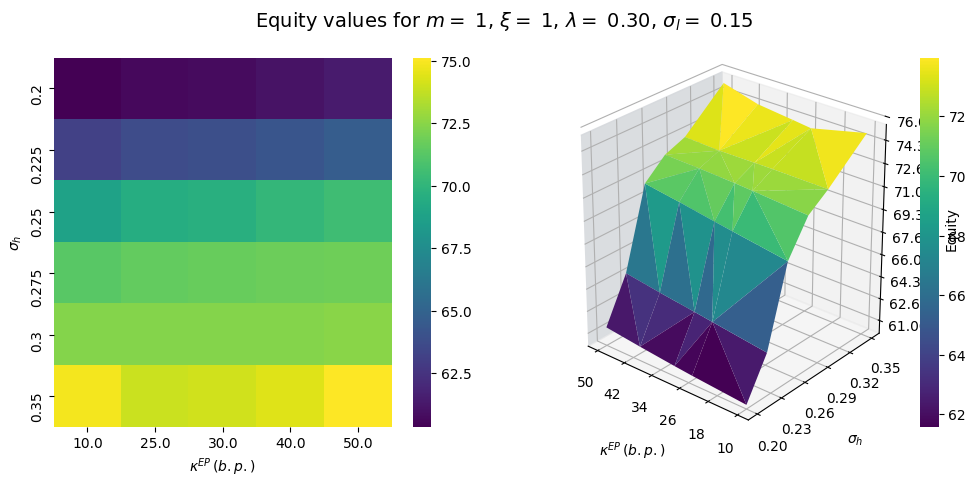

Updating SVM Slice Data


In [254]:
fig_name_vars = [:mu_b, :m, :xi, :lambda, :sigmal]
combinations = ModelPlots.plots_form_combinations(bt, fig_name_vars)

xy_list = [:sigmah, :kappa]
z_vars = [:equity]#, :debt, :c, :p, :vb, :leverage, :ROE]
fig_name_vars = [:mu_b, :m, :xi, :lambda, :sigmal]

graph_dict1 = Dict{Symbol, Any}(:azim => 50., 
                                :heat_reverse_y => false, 
                                :heat_reverse_x => false)

graph_dict2 = Dict{Symbol, Any}(:azim => -50., 
                                :heat_reverse_y => false, 
                                :heat_reverse_x => false)

# using3D()
figs_list = []
for comb in [combinations[3]]
    fixed_params = Dict(zip(fig_name_vars, comb))
    pt = ModelPlots.set_svm_surf(pt, fixed_params)
    
    res = Dict()
    for z in z_vars
        graph_dict = graph_dict1
        if z == :equity
            graph_dict = graph_dict2
        end
        
#         tmp = PyPlot.figure("pyplot_surfaceplot", figsize=PyPlot.figaspect(.4), facecolor="w")
        tmp = ModelPlots.svm_plot_heatmap_surf(pt, xy_list, z, fixed_params,
                                               heat_reverse_x=graph_dict[:heat_reverse_x],
                                               heat_reverse_y=graph_dict[:heat_reverse_y],
                                               elev=25., azim=graph_dict[:azim])
        get!(res, z, tmp)
    end
    
    push!(figs_list, res)
end

In [84]:
pt.svm_data[pt.svm_data[:m_comb_num] .==131, :]

,comb_num,m,m_comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64
1,131,1.0,131,0.02,0.02,0.0,0.001,0.2,0.35,0.15,1.0,2.58446,31.0458,35.1997,32.6542,31.9,-0.0110526,0.000408183,0.00191647,31.0458,31.0347,73.509,73.5037,104.538,29.6874,6.58077,100.0,0.08,0.6,0.27,1.0,0.0110526,-0.000356011,0.000356011,0.000408183,false,0.0


In [83]:
comb_num = 136
jlSlice = DataFrames.DataFrame(pt.svm_data[pt.svm_data[:comb_num] .== comb_num, :])

,comb_num,m,m_comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64
1,136,1.0,136,0.02,0.02,0.0,0.001,0.3,0.35,0.15,1.0,2.44479,29.1548,33.2226,30.6482,29.9535,0.0105439,0.000137632,0.00175302,29.1548,29.1654,74.9582,74.9607,104.126,28.0097,5.82488,100.0,0.08,0.6,0.27,1.0,0.0105439,0.000361651,0.000361651,0.000137632,false,0.0


In [88]:
m_comb_num = 131
sbt, svm = Batch.get_bt_svm(;m=1., m_comb_num=m_comb_num,
                            display_msgs=true)

svm.c = 2.74225 # jlSlice[1, :c]
svm.p = 33.8421 # jlSlice[1, :p]
vbl = 38.2517 # jlSlice[1, :vb]
EqFinDiff.eq_fd(svm, vbl)

Setting parameter dictionary using (m, m_comb_num) ID pair...
Batch object exists: true
Loading SVM object...
Unable to load batch object file.
Batch Object is incompatible! Loading surfaces only instead.
Setting initial vbl value to NaN
Setting initial vbh value to NaN
Setting initial c value to NaN
Setting initial p value to NaN
Interpolating Bond Pricing Surfaces...
  0.221239 seconds (811.43 k allocations: 137.114 MiB, 16.43% gc time)
Interpolating bond pricing surfaces...
  0.197156 seconds (811.42 k allocations: 137.112 MiB, 11.98% gc time)
Computing Equity Vmax
Vmax: 125.0
phi0: -25.010545018477302
phi1: 0.9999999999999998
pv_rfdebt: 33.84260619108875
debt_abs_per_diff: 1.7371043609793383e-9
eq_abs_per_diff: 0.0009401265670636926
Equity Vmax: 760.1758678463076
 
eq_max: 735.1653219967454
eq_vbl: 0.0
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.008414983749389648
 
Shape of Ga

,ROE,V0,alpha,c,debt,delta,eq_deriv,eq_deriv_min_val,eq_min_val,eq_negative,eq_vb,equity,firm_value,gross_delta,iota,kappa,lambda,leverage,m,mu_b,p,pi,r,sigmah,sigmal,vb,xi
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,6.48592,100.0,0.6,2.74225,33.7871,0.02,-0.0544879,-0.0544879,-0.00205447,false,0.0,70.5074,104.295,0.02,0.0,0.001,0.2,32.3958,1.0,1.0,33.8421,0.27,0.08,0.35,0.15,38.2517,1.0


In [ ]:
## xy_list = [:sigmah, :kappa]
z_var = :firm_value
xyz, grid_x, grid_y, grid_z, var_axes = ModelPlots.svm_interp_smooth_surface(pt, 
                                                                             fixed_params, 
                                                                             z_var)

In [102]:
m = unique(pt._svm_surf[:m])[1]
graphs_path, file_name = ModelPlots.svm_heat_surf_plot_path_fname(pt, m, xy_list, z_var, 
                                                                  fixed_params)

2-element Array{String,1}:
 "/mnt/ide0/home/artur/BondPricing/Julia/Plots/HeatSurf/m_1.0/kappa_sigmah/lambda_0.20"
 "firm_value_lambda_0.20__m_1.00__mu_b_1.00__xi_1.00__sigmal_0.15"                     

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = #svm_plot_heatmap_surf#60(::Bool, ::Float64, ::Float64, ::Float64, ::String, ::Bool, ::Bool, ::Bool, ::Bool, ::Bool, ::typeof(Main.ModelPlots.svm_plot_heatmap_surf), ::Main.ModelPlots.PlotStruct, ::Figure, ::Array{Symbol,1}, ::Symbol, ::Dict{Symbol,Float64}) at _svm_plot_methods.jl:375
└ @ Main.ModelPlots /home/artur/BondPricing/Julia/modules/ModelPlots/_svm_plot_methods.jl:375
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #svm_plot_surface#38(::String, ::Bool, ::Bool, ::Float64, ::Float64, ::Float64, ::Function, ::Main.ModelPlots.PlotStruct, ::PyCall.PyObject, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Symbol,1}, ::Symbol, ::Dict{Symbol,Float64}) at _svm_plot_methods.jl:244
└ @ Main.ModelPlots /home/artur/BondPricing/Julia/modu

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #svm_plot_surface#38(::String, ::Bool, ::Bool, ::Float64, ::Float64, ::Float64, ::Function, ::Main.ModelPlots.PlotStruct, ::PyCall.PyObject, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Symbol,1}, ::Symbol, ::Dict{Symbol,Float64}) at _svm_plot_methods.jl:269
└ @ Main.ModelPlots /home/artur/BondPricing/Julia/modules/ModelPlots/_svm_plot_methods.jl:269
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #svm_plot_surface#38(::String, ::Bool, ::Bool, ::Float64, ::Float64, ::Float64, ::Function, ::Main.ModelPlots.PlotStruct, ::PyCall.PyObject, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Symbol,1}, ::Symbol, ::Dict{Symbol,Float64}

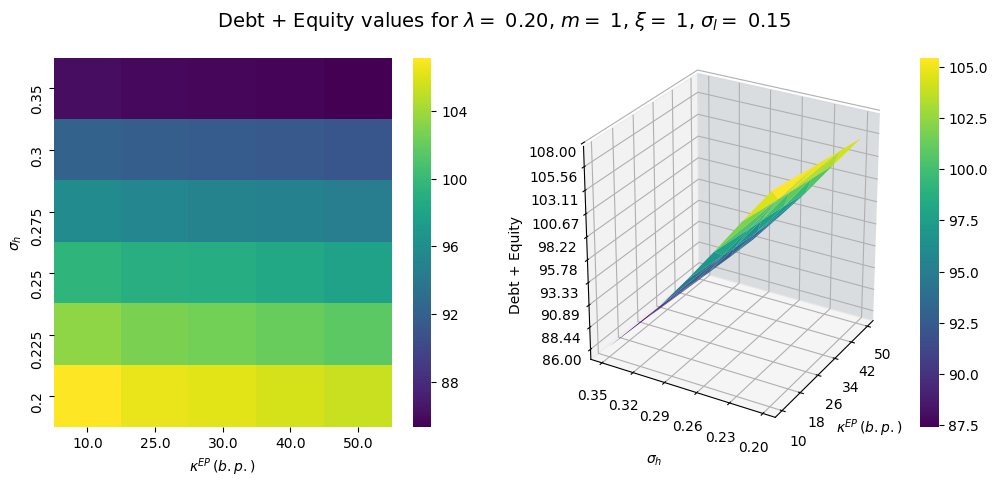

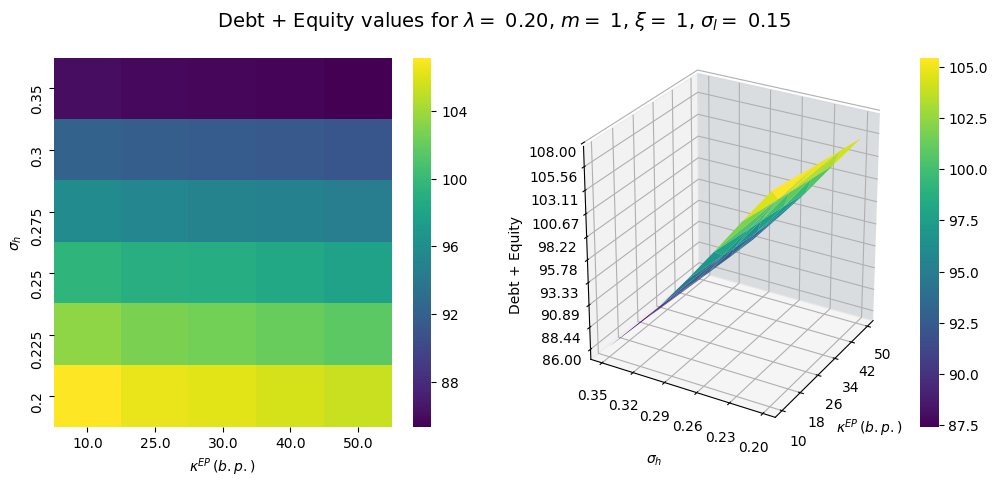

In [23]:
using3D()
fig = PyPlot.figure("pyplot_surfaceplot", figsize=PyPlot.figaspect(.4), facecolor="w")
fig = ModelPlots.svm_plot_heatmap_surf(pt, fig, xy_list, z_var, fixed_params)

# CVM vs SVM Plots

## Market Illiquidity - Transaction Costs

In [814]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

In [816]:
# Plots.plotlyjs()
# Plots.pyplot()
# Plots.plot(background_color="white")

#     #  Symbol[:auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
#     svmlinestyles = [:solid, :dot, :dashdot]
#     cvmlinestyles = [:solid,  :dot, :dashdot]
                
# #     Symbol[:none, :auto, :circle, :rect, :star5, :diamond, 
# #            :hexagon, :cross, :xcross, :utriangle, :dtriangle, 
# #            :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, 
# #            :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]
#     svmmarkers = [:none, :diamond, :star4]
#     cvmmarkers = [:cross, :rtriangle, :octagon]


#         ax.plot(svm_slice[xvar], svm_slice[yvar],
#                     linecolor="blue", 
#                     linewidth=1,
#                     linestyle=svmlinestyles[i],
#                     seriestype=:line,
#                     markershape=svmmarkers[i], 
#                     markersize=3, label=svm_label,
#                     contour_labels=true)

#     Plots.title!(plot_title)

# fig[:dpi] = 300
# fig[:size]=(900, 500)

## Market Illiquidity - Transaction Costs

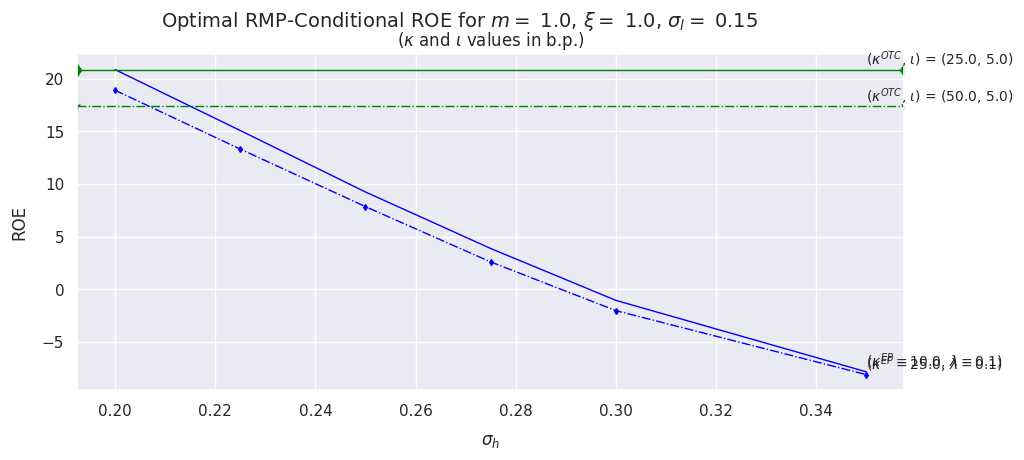

Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using unique combination ID...


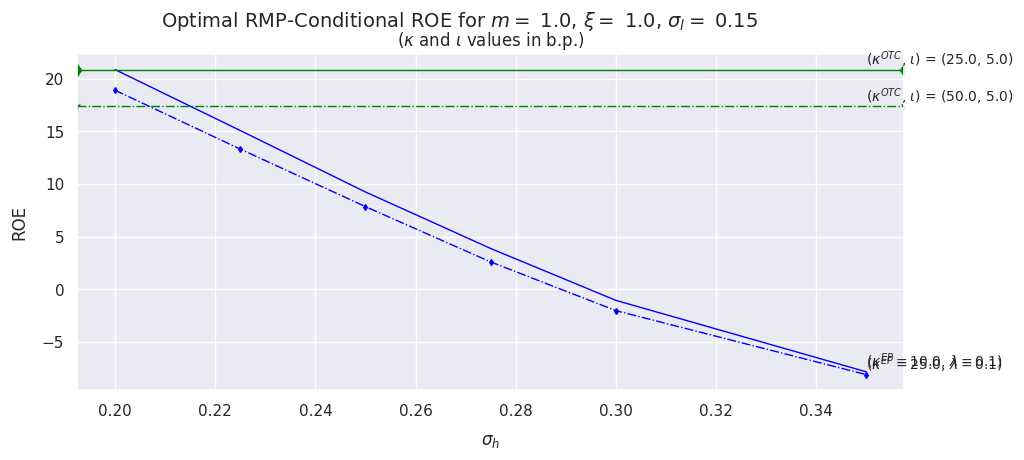

In [817]:
sbt = Batch.get_bt(; model="svm", m=1., m_comb_num=1)
cbt = Batch.get_bt(; model="cvm", comb_num=1)

cvmls = [ ]
for i in [25, 26]
    tmp = cbt.bp.df[.&(cbt.bp.df[:m].==1., cbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :lambda, :sigmah])]
    push!(cvmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

svmls = [ ]
for i in [1, 2]
    tmp = sbt.bp.df[.&(sbt.bp.df[:m].==1., sbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :sigmah])]
    push!(svmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

pardict = Dict("svm" => svmls, 
               "cvm" => cvmls)

fPN = string(sbt.dfn.main_dir, "/Graphs/Comparison")
                        
fig = ModelPlots.cvm_vs_svm_plotfun(pt, :ROE, pardict; plot_vlines=false, figPath=fPN)

## Risk-Management Costs

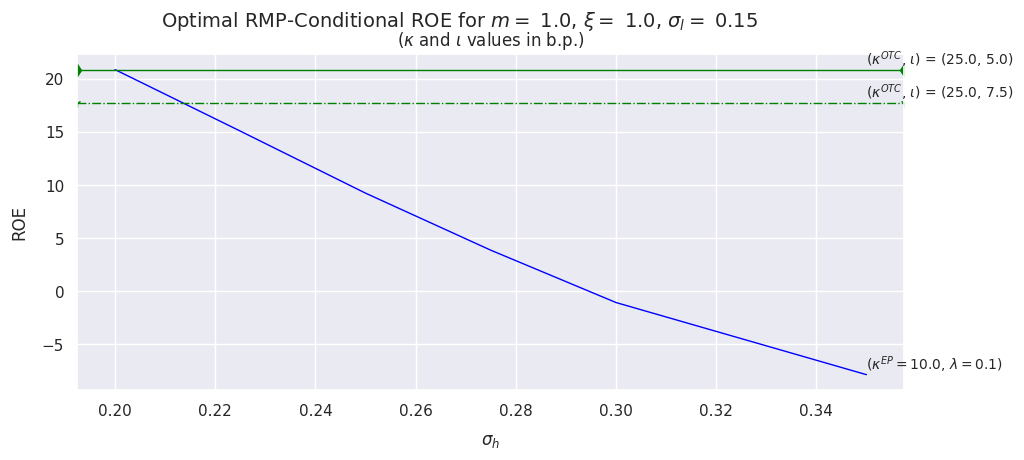

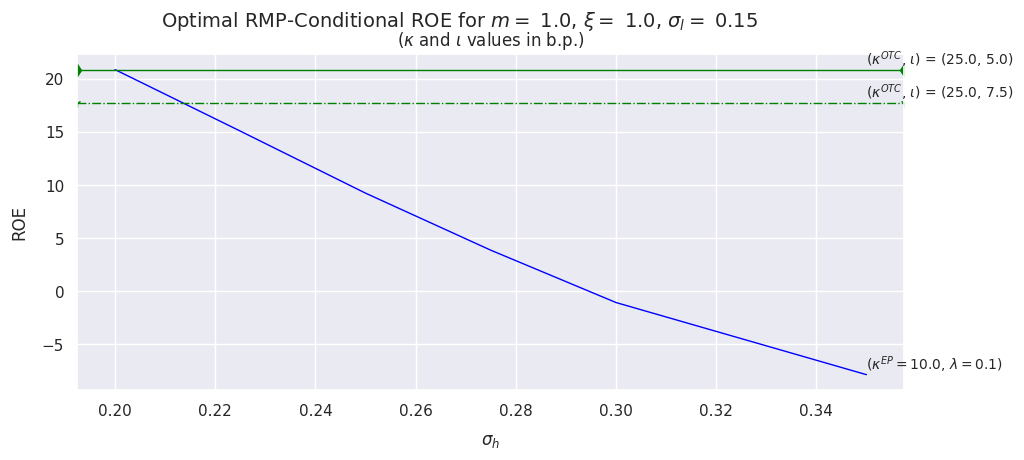

In [819]:
cvmls = [ ]
for i in [25, 29]
    tmp = cbt.bp.df[.&(cbt.bp.df[:m].==1., cbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :lambda, :sigmah])]
    push!(cvmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

svmls = [ ]
for i in [1]
    tmp = sbt.bp.df[.&(sbt.bp.df[:m].==1., sbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :sigmah])]
    push!(svmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

pardict = Dict("svm" => svmls, 
               "cvm" => cvmls)

fPN = string(sbt.dfn.main_dir, "/Graphs/Comparison")
                        
fig = ModelPlots.cvm_vs_svm_plotfun(pt, :ROE, pardict; plot_vlines=false, figPath=fPN)

## Volatility Risk Intensity

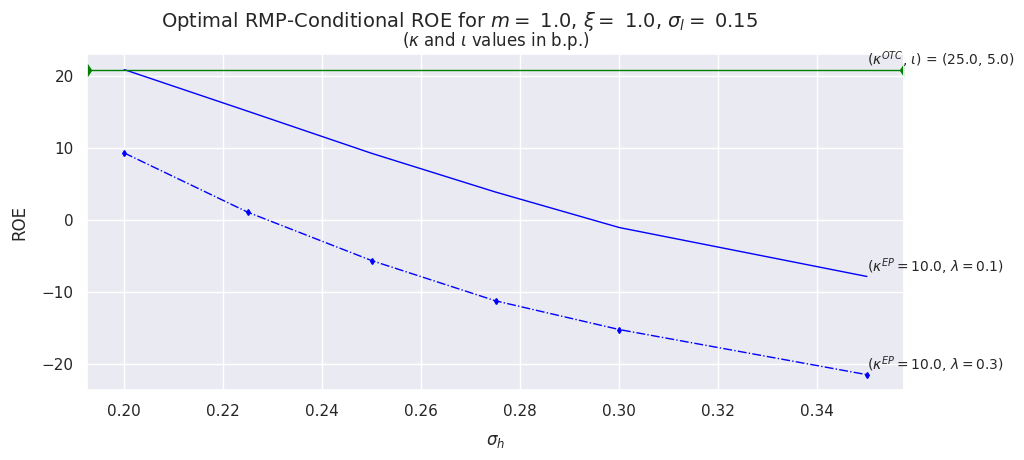

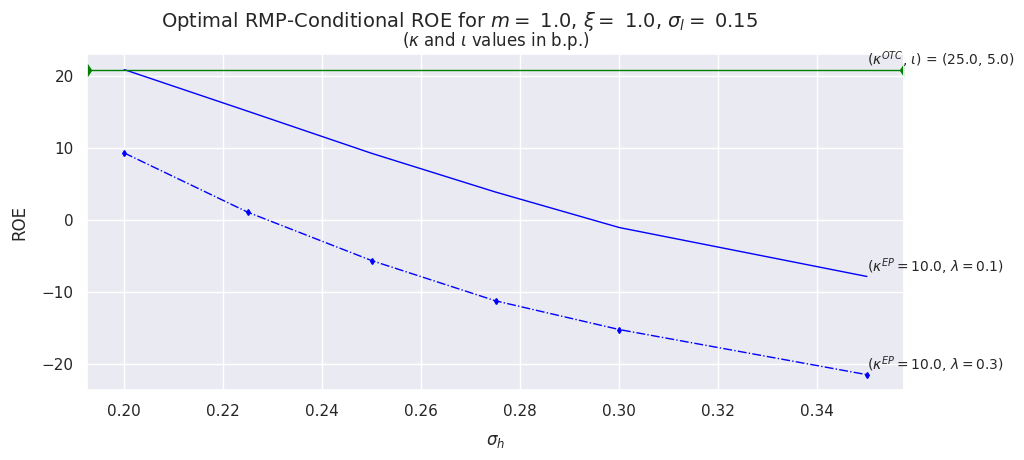

In [820]:
cvmls = [ ]
for i in [25]
    tmp = cbt.bp.df[.&(cbt.bp.df[:m].==1., cbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :lambda, :sigmah])]
    push!(cvmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

svmls = [ ]
for i in [1, 11]
    tmp = sbt.bp.df[.&(sbt.bp.df[:m].==1., sbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :sigmah])]
    push!(svmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

pardict = Dict("svm" => svmls, 
               "cvm" => cvmls)

fPN = string(sbt.dfn.main_dir, "/Graphs/Comparison")
                        
fig = ModelPlots.cvm_vs_svm_plotfun(pt, :ROE, pardict; plot_vlines=false, figPath=fPN)

# TRASH

In [ ]:
xy_list = [:sigmah, :kappa]
z_vars = ["firm_value", "equity", "debt", "c", "p", "vb", "leverage", "ROE"]
fig_name_vars = ["mu_b", "m", "xi", "lambda", "sigmal"]

comb_mat = hcat(bt._params_combs...)'
value_lists = 
[[1]] + [param_values_dict[x] for x in fig_name_vars[1:]]
combinations = np.array(np.meshgrid(*value_lists)).T.reshape(-1, len(fig_name_vars))
    
# value_lists = [[1]] + [np.asarray(item[1]) for item in param_values_dict.items() if item[0] in fig_name_vars]
# value_lists = [[1]] + [np.array(param_values_dict[x]) for x in fig_name_vars[1:]]
# combinations = np.array(np.meshgrid(*value_lists)).T.reshape(-1, len(fig_name_vars))

# All variables but equity:
grph_dict1 = Dict("azim" => 50,
                  "order_ascend" => true,
                  "reorder_x" => false)

# Equity:
grph_dict2 = Dict("azim" => -50,
                  "order_ascend" => true,
                  "reorder_x" => false)
